# Transfer with memory and without memory
The idea here is to see whether the system works whether the evolution equation for the support is:

ds/ dt = w @ z 

or 

ds/dt = w @ o 

That is, whether the information is conveyed by the immediate state of the system or it uses the z-filter to preserve information about the state of the system in time. 

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.0)

from network import Protocol, BCPNNModular, NetworkManager
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities


## General parameters

In [47]:
g_w_ampa = 2.0
g_w = 1.0 
g_a = 10.0
tau_a = 0.250
tau_z = 0.150
G = 1.0
tau_m = 0.001

## Running example

In [48]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNModular(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  tau_z_pre=tau_z, G=G, tau_m=tau_m,
                  z_transfer=False)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


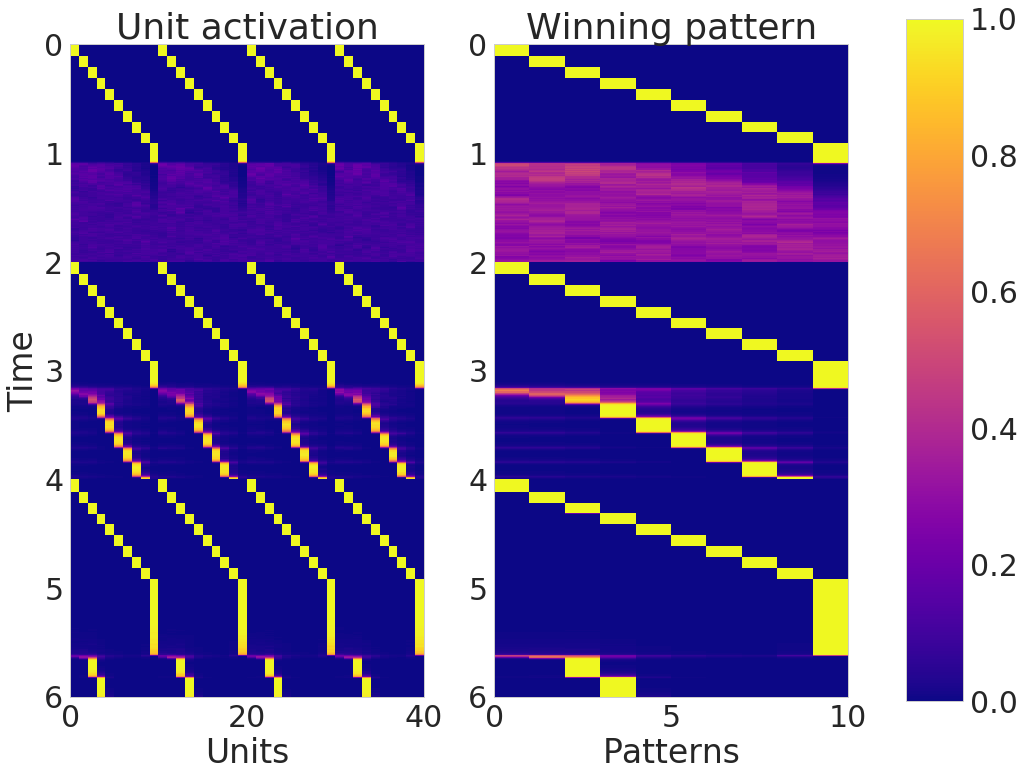

In [49]:
plot_network_activity_angle(manager)

success 100.0


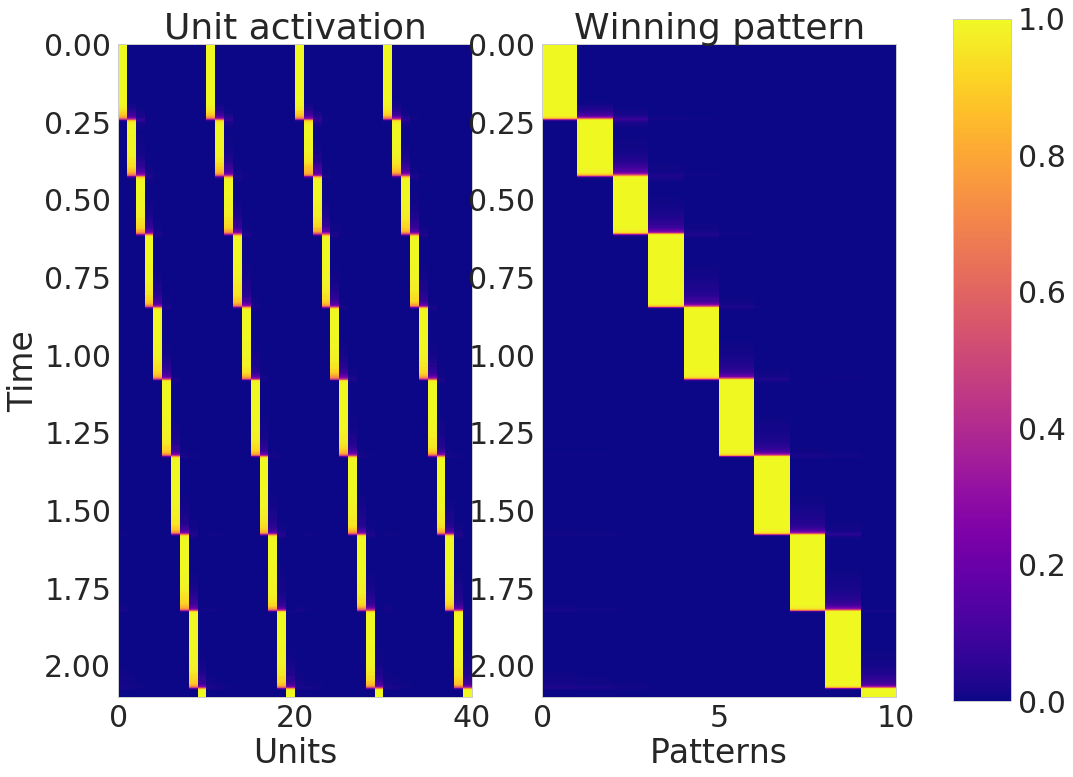

In [50]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

We see that in normal conditions this is recalled correctly. What are we going to do next is to try to start from the simplest possible model to isolate the effects of each component

In [51]:
# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNModular(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_z_pre=tau_z,
                  z_transfer=False, diagonal_zero=False)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


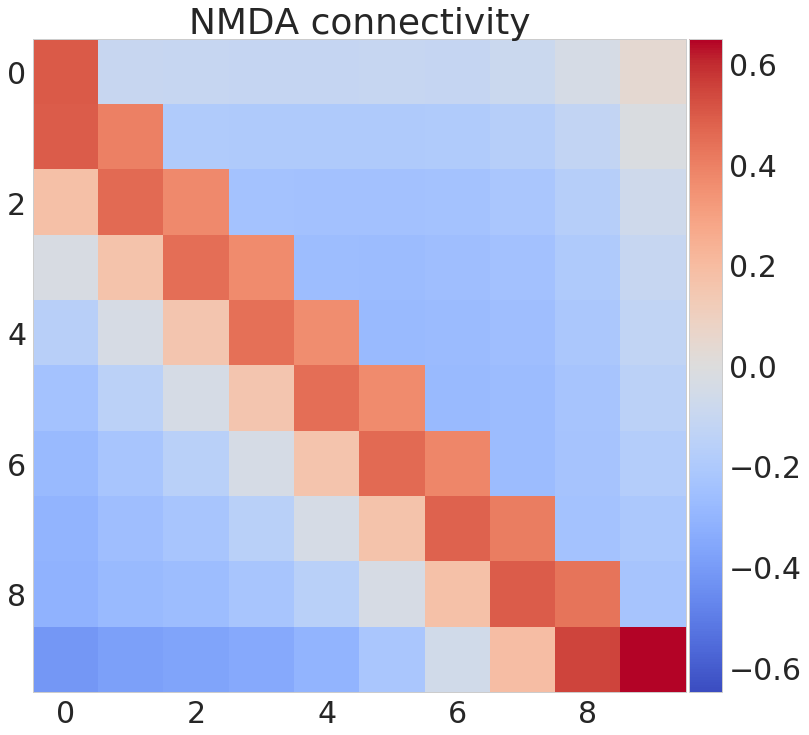

In [52]:
plot_weight_matrix(manager.nn, ampa=False, one_hypercolum=False)

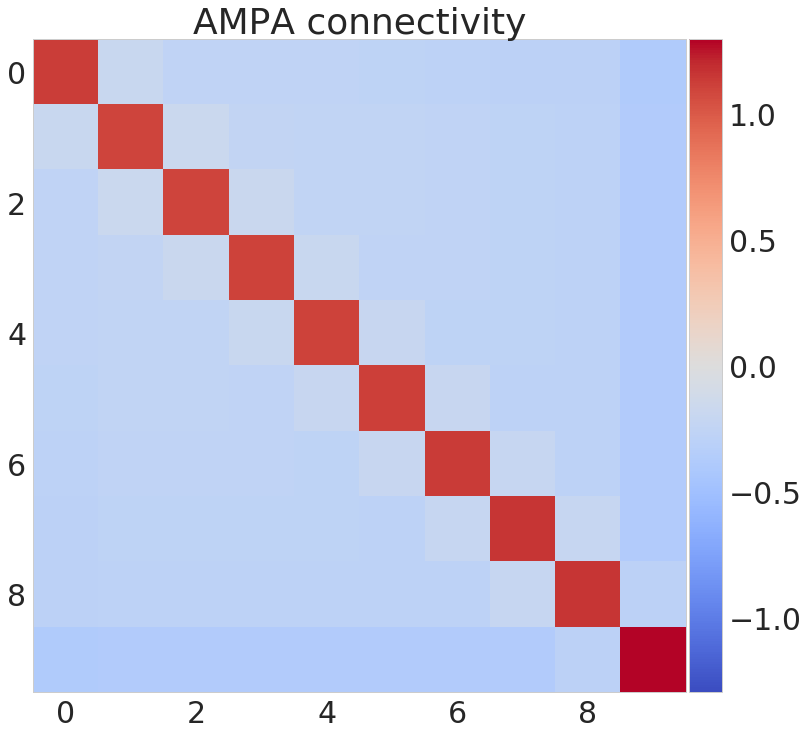

In [53]:
plot_weight_matrix(manager.nn, ampa=True, one_hypercolum=False)

success 100.0


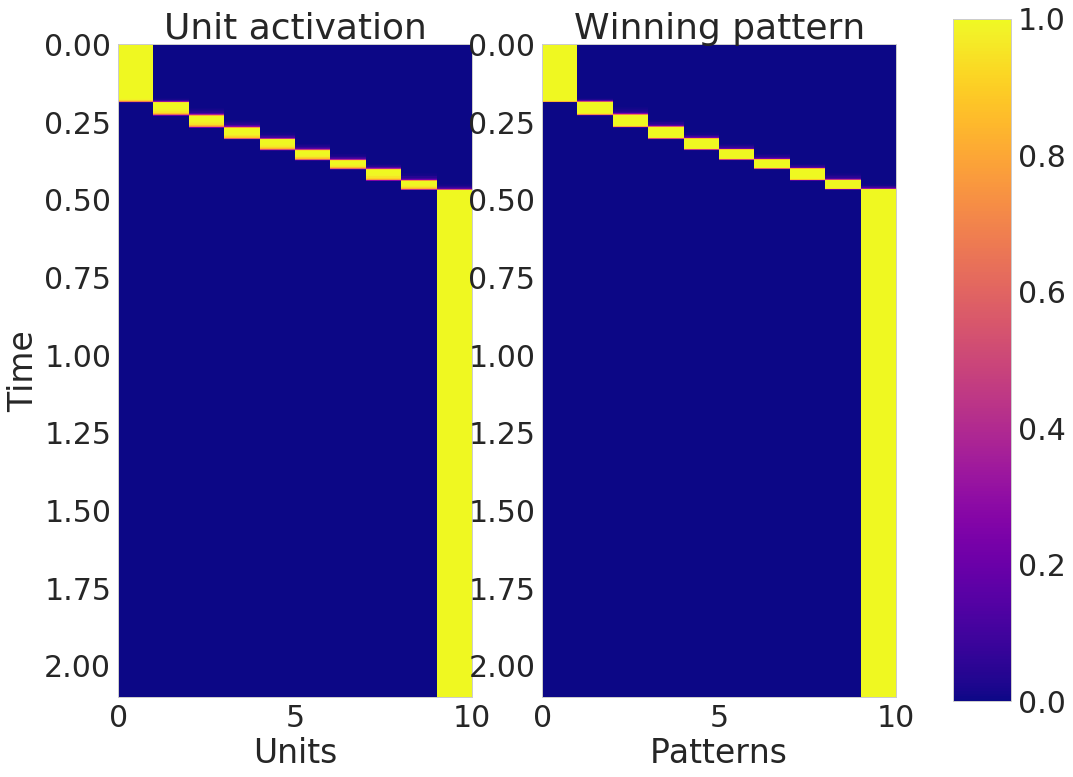

In [62]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1
nn.G = 0.5
nn.g_w = 20.0

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

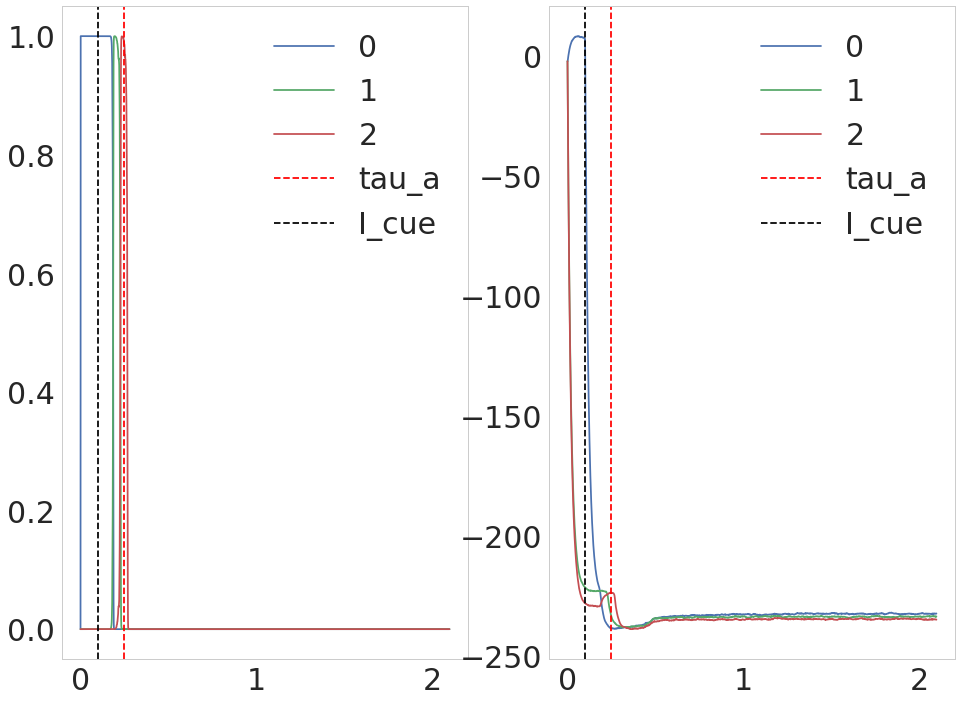

In [63]:
o = manager.history['o']
s = manager.history['s']
a = manager.history['a']
i_ampa = manager.history['i_ampa']
i_nmda = manager.history['i_nmda']
beta = manager.history['beta']

time = np.arange(0, manager.T_total, manager.dt)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, o[:, 0], label='0')
ax1.plot(time, o[:, 1], label='1')
ax1.plot(time, o[:, 2], label='2')
ax1.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax1.axvline(T_cue, ls='--', color='black', label='I_cue')

ax1.legend()

ax2.plot(time, s[:, 0], label='0')
ax2.plot(time, s[:, 1], label='1')
ax2.plot(time, s[:, 2], label='2')
ax2.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax2.axvline(T_cue, ls='--', color='black', label='I_cue')

ax2.legend();